In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading of Data

In [84]:
df = pd.read_csv("delivery_data.csv")

In [85]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:01,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000


### shape of the Data

In [86]:
df.shape

(144867, 24)

In [87]:
df.drop(columns=['segment_factor','data','factor','is_cutoff', 'cutoff_factor','cutoff_timestamp',
                'route_schedule_uuid'],
       axis=1, inplace=True)

In [88]:
df.shape

(144867, 17)

### Removing of Null Values

In [89]:
df.dropna(how = "any")
df.reset_index(drop=True)

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,10.435660,14,11,11.9653,14,11,11.9653
1,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,18.936842,24,20,21.7243,10,9,9.7590
2,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,27.637279,40,28,32.5395,16,7,10.8152
3,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,36.118028,62,40,45.5620,21,12,13.0224
4,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,39.386040,68,44,54.2181,6,5,3.9153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,20-09-2018 16:24,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),20-09-2018 16:24,20-09-2018 23:32,427,45.258278,94,60,67.9280,12,12,8.1858
144863,20-09-2018 16:24,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),20-09-2018 16:24,20-09-2018 23:32,427,54.092531,120,76,85.6829,26,21,17.3725
144864,20-09-2018 16:24,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),20-09-2018 16:24,20-09-2018 23:32,427,66.163591,140,88,97.0933,20,34,20.7053
144865,20-09-2018 16:24,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),20-09-2018 16:24,20-09-2018 23:32,427,73.680667,158,98,111.2709,17,27,18.8885


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144867 non-null  object 
 1   route_type                      144867 non-null  object 
 2   trip_uuid                       144867 non-null  object 
 3   source_center                   144867 non-null  object 
 4   source_name                     144574 non-null  object 
 5   destination_center              144867 non-null  object 
 6   destination_name                144606 non-null  object 
 7   od_start_time                   144867 non-null  object 
 8   od_end_time                     144867 non-null  object 
 9   start_scan_to_end_scan          144867 non-null  int64  
 10  actual_distance_to_destination  144867 non-null  float64
 11  actual_time                     144867 non-null  int64  
 12  osrm_time       

In [91]:
df.isna().sum()

trip_creation_time                  0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [92]:
d_grouped = df.groupby(["trip_uuid","source_center","destination_center"])

In [93]:
df[df["trip_uuid"]=="trip-153741093647649320"]

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,10.435660,14,11,11.9653,14,11,11.9653
1,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,18.936842,24,20,21.7243,10,9,9.7590
2,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,27.637279,40,28,32.5395,16,7,10.8152
3,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,36.118028,62,40,45.5620,21,12,13.0224
4,20-09-2018 02:35,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,20-09-2018 04:47,86,39.386040,68,44,54.2181,6,5,3.9153
5,20-09-2018 02:35,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,20-09-2018 06:36,109,10.403038,15,11,12.1171,15,11,12.1171
6,20-09-2018 02:35,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,20-09-2018 06:36,109,18.045481,44,17,21.2890,28,6,9.1719
7,20-09-2018 02:35,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,20-09-2018 06:36,109,28.061896,65,29,35.8252,21,11,14.5362
8,20-09-2018 02:35,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,20-09-2018 06:36,109,38.939167,76,39,47.1900,10,10,11.3648
9,20-09-2018 02:35,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,20-09-2018 06:36,109,43.595802,102,45,53.2334,26,6,6.0434


### Feature Engineering

In [94]:
# Converting time column to pandas datetime
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"]= pd.to_datetime(df["od_end_time"])
df["trip_creation_time"]= pd.to_datetime(df["trip_creation_time"])

In [95]:
#extracting day, month & year from trip_creation_time 
df['trip_creation_month']=df['trip_creation_time'].dt.month
df['trip_creation_year']=df['trip_creation_time'].dt.year
df['trip_creation_day']=df['trip_creation_time'].dt.day

In [96]:
#difference between od_start & od_end time in hours
df['Timediff_start_end_H']=round((df['od_end_time']-df['od_start_time'])/pd.Timedelta(minutes=1),2)

In [97]:
#as below mentioned columns are comprising of segment related details we will do a cum sum
df['agg_segment_actual_time']=df.groupby(['trip_uuid','source_center','destination_center'])['segment_actual_time'].transform('cumsum')
df['agg_segment_osrm_time']=df.groupby(['trip_uuid','source_center','destination_center'])['segment_osrm_time'].transform('cumsum')
df['agg_segment_osrm_distance']=df.groupby(['trip_uuid','source_center','destination_center'])['segment_osrm_distance'].transform('cumsum')

In [98]:
#After finding out the cumsum of above columns we will pick their max 
df['agg_segment_actual_time1']=df.groupby(['trip_uuid','source_center','destination_center'])['agg_segment_actual_time'].transform('max')
df['agg_segment_osrm_time1']=df.groupby(['trip_uuid','source_center','destination_center'])['agg_segment_osrm_time'].transform('max')
df['agg_segment_osrm_distance1']=df.groupby(['trip_uuid','source_center','destination_center'])['agg_segment_osrm_distance'].transform('max')

In [99]:
# aggregation of below mentioned based on their Trip_uuid, Source center and Destination center 
# as they are mentioned as a cumsum in data dictionary we will take max
df['agg_distance_to_destination']=df.groupby(['trip_uuid','source_center','destination_center'])['actual_distance_to_destination'].transform('max')
df['agg_actual_time']=df.groupby(['trip_uuid','source_center','destination_center'])['actual_time'].transform('max')
df['agg_osrm_time']=df.groupby(['trip_uuid','source_center','destination_center'])['osrm_time'].transform('max')
df['agg_osrm_distance']=df.groupby(['trip_uuid','source_center','destination_center'])['osrm_distance'].transform('max')

In [100]:
#creating column with city place state from source centre & destination centre
df[['Source_City','Source_Place','Source_Code/State']]=df['source_name'].str.rsplit('_',2, expand=True)
df[['destination_City','destination_Place','destination_Code/State']]=df['destination_name'].str.rsplit('_',2, expand=True)

In [101]:

df[['Source_Code','Source_State']]=df['Source_Code/State'].str.rsplit('(',2, expand=True)
df[['destination_Code','destination_State']]=df['destination_Code/State'].str.rsplit('(',2, expand=True)

In [102]:
#dropping the existing columns as we have already got engineered features from them
df.drop(columns=['od_end_time','od_start_time','trip_creation_time','source_name','destination_name'],axis=1,inplace=True)

In [103]:
df.shape

(144867, 36)

In [104]:
df.duplicated().sum()

0

In [105]:
df.head(2)

,route_type,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State,Source_Code,Source_State,destination_Code,destination_State
0,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86,10.435660,14,11,11.9653,14,...,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat),D,Gujarat)
1,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,86,18.936842,24,20,21.7243,10,...,Anand,VUNagar,DC (Gujarat),Khambhat,MotvdDPP,D (Gujarat),DC,Gujarat),D,Gujarat)


In [106]:
df_merge=df.loc[:,['route_type', 'trip_uuid',
       'start_scan_to_end_scan',  'trip_creation_month',
       'trip_creation_year', 'trip_creation_day', 'Timediff_start_end_H', 'agg_segment_actual_time1',
       'agg_segment_osrm_time1', 'agg_segment_osrm_distance1',
       'agg_distance_to_destination', 'agg_actual_time', 'agg_osrm_time',
       'agg_osrm_distance', 'Source_City', 'Source_Place', 'Source_Code/State',
       'destination_City', 'destination_Place', 'destination_Code/State']]

In [107]:
df_merge.duplicated().sum()

118498

In [108]:
df_merge.drop_duplicates(inplace=True)

In [109]:
df_merge[df_merge['trip_uuid']=='trip-153671041653548748'].head(2)

,route_type,trip_uuid,start_scan_to_end_scan,trip_creation_month,trip_creation_year,trip_creation_day,Timediff_start_end_H,agg_segment_actual_time1,agg_segment_osrm_time1,agg_segment_osrm_distance1,agg_distance_to_destination,agg_actual_time,agg_osrm_time,agg_osrm_distance,Source_City,Source_Place,Source_Code/State,destination_City,destination_Place,destination_Code/State
124981,FTL,trip-153671041653548748,999,12,2018,9,999.0,820,474,649.8528,440.973689,830,394,544.8027,Bhopal,Trnsport,H (Madhya Pradesh),Kanpur_Central,H,6 (Uttar Pradesh)
125002,FTL,trip-153671041653548748,1260,12,2018,9,-125459.0,728,534,670.6205,383.759164,732,349,446.5496,Kanpur_Central,H,6 (Uttar Pradesh),Gurgaon,Bilaspur,HB (Haryana)


In [110]:
df_merge.duplicated().sum()

0

In [111]:
df_merge.shape

(26369, 20)

In [112]:
df_uuid=df_merge.copy()

In [113]:
# aggregation of below mentioned based on their Trip_uuid, Source ID and Destination ID 
# as they are mentioned as a cumsum in data dictionary we will take max
df_uuid['start_scan_to_end_scan11']=df_uuid.groupby(['trip_uuid'])['start_scan_to_end_scan'].transform('sum')
df_uuid['Timediff_start_end_H11']=df_uuid.groupby(['trip_uuid'])['Timediff_start_end_H'].transform('sum')
df_uuid['agg_segment_actual_time11']=df_uuid.groupby(['trip_uuid'])['agg_segment_actual_time1'].transform('sum')
df_uuid['agg_segment_osrm_time11']=df_uuid.groupby(['trip_uuid'])['agg_segment_osrm_time1'].transform('sum')

df_uuid['agg_segment_osrm_distance11']=df_uuid.groupby(['trip_uuid'])['agg_segment_osrm_distance1'].transform('sum')
df_uuid['agg_distance_to_destination11']=df_uuid.groupby(['trip_uuid'])['agg_distance_to_destination'].transform('sum')
df_uuid['agg_actual_time11']=df_uuid.groupby(['trip_uuid'])['agg_actual_time'].transform('sum')
df_uuid['agg_osrm_time11']=df_uuid.groupby(['trip_uuid'])['agg_osrm_time'].transform('sum')
df_uuid['agg_osrm_distance11']=df_uuid.groupby(['trip_uuid'])['agg_osrm_distance'].transform('sum')

df_uuid['Source_City11']=df_uuid.groupby(['trip_uuid'])['Source_City'].transform('first')
df_uuid['Source_Place11']=df_uuid.groupby(['trip_uuid'])['Source_Place'].transform('first')
df_uuid['Source_Code/State11']=df_uuid.groupby(['trip_uuid'])['Source_Code/State'].transform('first')
df_uuid['destination_City11']=df_uuid.groupby(['trip_uuid'])['destination_City'].transform('last')
df_uuid['destination_Place11']=df_uuid.groupby(['trip_uuid'])['destination_Place'].transform('last')
df_uuid['destination_Code/State11']=df_uuid.groupby(['trip_uuid'])['destination_Code/State'].transform('last')

In [114]:
dfm=df_uuid.loc[:,['route_type', 'trip_uuid',
        'trip_creation_month', 'trip_creation_year', 'trip_creation_day',
       'start_scan_to_end_scan11', 'Timediff_start_end_H11',
       'agg_segment_actual_time11', 'agg_segment_osrm_time11',
       'agg_segment_osrm_distance11', 'agg_distance_to_destination11',
       'agg_actual_time11', 'agg_osrm_time11', 'agg_osrm_distance11',
       'Source_City11', 'Source_Place11', 'Source_Code/State11',
       'destination_City11', 'destination_Place11',
       'destination_Code/State11']]

In [115]:
dfm.duplicated().sum()

11552

In [116]:
dfm.drop_duplicates(inplace=True)

In [117]:
dfm.duplicated().sum()

0

In [118]:
dfm.shape

(14817, 20)

### So after the entire merging the final dataset that has induced features and distict rows :

### 14817:  Rows   

### 20:     Columns

### Comparing the difference between time taken between Timediff_start_end_H11 and start_scan_to_end_scan.

In [119]:
dfm['scan_diff_check']=dfm['Timediff_start_end_H11']-dfm['start_scan_to_end_scan11']

### Visualization of Difference between the two start_scan_to_end_scan & Timediff_start_end_H:


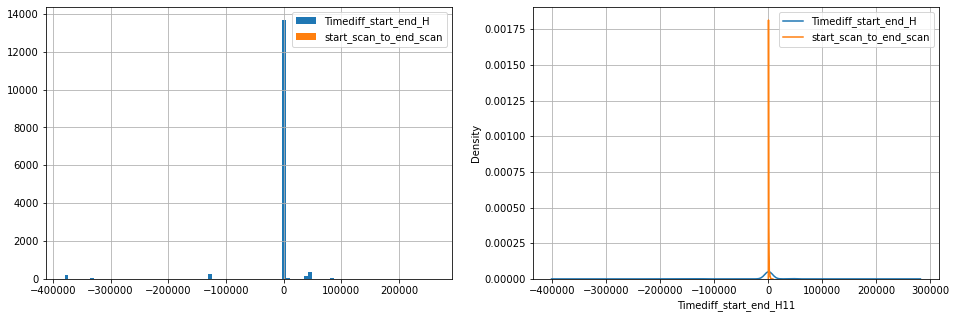

In [120]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.hist(dfm['Timediff_start_end_H11'],bins=100,label='Timediff_start_end_H')
plt.hist(dfm['start_scan_to_end_scan11'],bins=100,label='start_scan_to_end_scan')
plt.legend()
plt.grid()
plt.subplot(122)
sns.kdeplot(dfm['Timediff_start_end_H11'],label='Timediff_start_end_H')
sns.kdeplot(dfm['start_scan_to_end_scan11'],label='start_scan_to_end_scan')
plt.legend()
plt.grid()
plt.show()

### As both the curv is overlapping which means both are same

### Hypothesis Testing

### 𝐻0 : the mean for Timediff_start_end_H & start_scan_to_end_scan are same

### 𝐻𝑎 : the mean for start_scan_to_end_scan is more than Timediff_start_end_H

### Alpha = 0.05

In [150]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(dfm['Timediff_start_end_H11'],dfm['start_scan_to_end_scan11'])

In [151]:
test_stat

-13.620028341627336

In [152]:
p_value

4.0778544282610784e-42

In [103]:
import scipy.stats as stats
st,p = stats.ttest_ind(dfm['Timediff_start_end_H11'],dfm['start_scan_to_end_scan11'])
print('P-value :',(p/2))

P-value : 2.0389272141305392e-42


### Comparision Between Aggregate Actual time & Aggregate OSRM Time

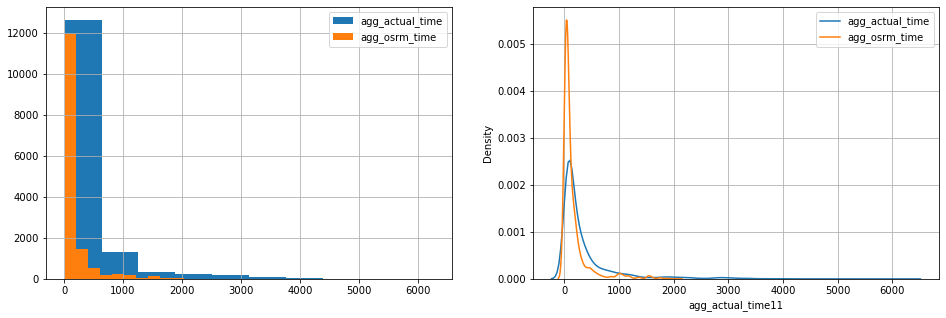

In [153]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.hist(dfm['agg_actual_time11'],bins=10,label='agg_actual_time')
plt.hist(dfm['agg_osrm_time11'],bins=10,label='agg_osrm_time')
plt.legend()
plt.grid()
plt.subplot(122)
sns.kdeplot(dfm['agg_actual_time11'],label='agg_actual_time')
sns.kdeplot(dfm['agg_osrm_time11'],label='agg_osrm_time')
plt.legend()
plt.grid()
plt.show()

### agg_actual time is greater than aggr osrm time

### Comparision Between Aggregate OSRM distance & Aggregate Segment osrm distance

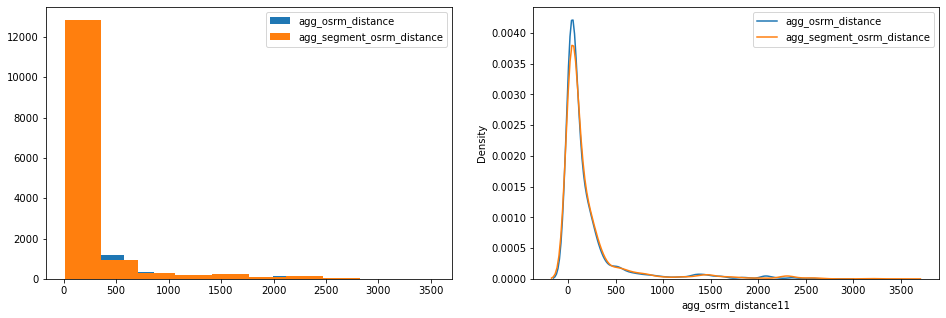

In [158]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.hist(dfm['agg_osrm_distance11'],bins=10,label='agg_osrm_distance')
plt.hist(dfm['agg_segment_osrm_distance11'],bins=10,label='agg_segment_osrm_distance')
plt.legend()
plt.subplot(122)
sns.kdeplot(dfm['agg_osrm_distance11'],label='agg_osrm_distance')
sns.kdeplot(dfm['agg_segment_osrm_distance11'],label='agg_segment_osrm_distance')
plt.legend()
plt.grid()
plt.grid()
plt.show()

### . As both the curv are overlapping which means both agg_segement_osrm_distance and agg_osrm_distance are same

### Hpothesis testing of mean difference of agg_actual_time and agg_osrm_time

### Ho: the mean for agg_actual_time & agg_osrm_time are same

### Ha: the mean for agg_actual_time is more than agg_osrm_time

In [165]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(dfm["agg_actual_time11"], dfm["agg_osrm_time11"])
print(p_value)

1.845661092540984e-309


In [162]:
p_value
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject Ho")

Reject H0


### As p_value is less than Alpha = 0.05 so we reject the null hypothesis which means there is the difference between agg_actual_time and agg_osrm_time

### Hpothesis testing of mean difference of agg_osrm_distance and agg_segment_osrm_distance

### H0: the mean for Agg_osrm_distance & agg_segment_osrm_distance are same    

### Ha: the mean for Agg_osrm_distance & agg_segment_osrm_distance are different

In [163]:
test_stat,p_value = ttest_ind(dfm["agg_osrm_distance11"],dfm["agg_segment_osrm_distance11"])

In [164]:
print(test_stat)
print(p_value)
if p_value < 0.05:
    print("reject H0")
else:
    print("Fail to reject H0")

-3.9508887316361827
7.804180497188243e-05
reject H0


### As p_value is less than Alpha = 0.05 so we reject the null hypothesis which means there is the difference between agg_osrm_distance and agg_segement_osrm_distance

### Comparision Between Aggregate Actual time & Aggregate segment_actual_time

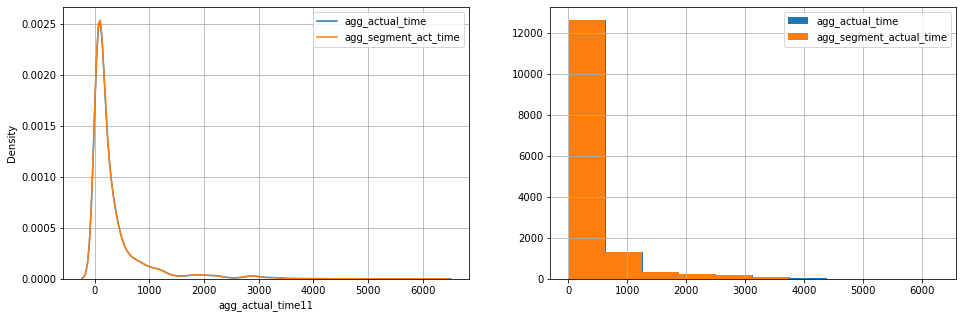

In [167]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(dfm['agg_actual_time11'],label='agg_actual_time')
sns.kdeplot(dfm['agg_segment_actual_time11'],label='agg_segment_act_time')
plt.legend()
plt.grid()
plt.subplot(122)
plt.hist(dfm['agg_actual_time11'],bins=10,label='agg_actual_time')
plt.hist(dfm['agg_segment_actual_time11'],bins=10,label='agg_segment_actual_time')
plt.legend()
plt.grid()
plt.show()

### As both the curve overlaps each others which means both variable i.e agg_actaul_time and agg_segement_act_time are same

### Comparision Between Aggregate OSRM time & Aggregate Segment OSRM Time

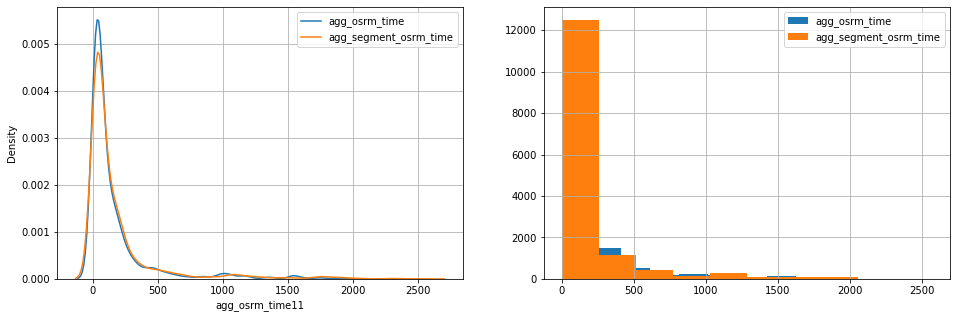

In [166]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(dfm['agg_osrm_time11'],label='agg_osrm_time')
sns.kdeplot(dfm['agg_segment_osrm_time11'],label='agg_segment_osrm_time')
plt.legend()
plt.grid()
plt.subplot(122)
plt.hist(dfm['agg_osrm_time11'],bins=10,label='agg_osrm_time')
plt.hist(dfm['agg_segment_osrm_time11'],bins=10,label='agg_segment_osrm_time')
plt.legend()
plt.grid()
plt.show()

### As it is visible for graph that agg_actual_time is greater than agg_segement_osrm_time

### Hypothesis testing of Agg_actual_time and agg_segement_actual_time

### H0: the Mean of agg_actual_time and agg_segement_actual_time are same

### Ha: the Mean of agg_actual_time and agg_segement_actual_time are different

In [168]:
test_stat, p_value = ttest_ind(dfm["agg_actual_time11"],dfm["agg_segment_actual_time11"])
print(p_value)

0.6176477212251261


In [169]:
if p_value < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

fail to reject H0


### As P_vale>alpha(0.05) so we fail to reject the null hypothesis which means there is diffrence between agg_actual_time and agg_segement actaul_time

### Hypothesis testing of agg_osrm_time and agg_segement_osrm_time

### H0: the mean of agg_osrm time and agg_segement_osrm_time are same

### Ha: the mean of agg_osrm time and agg_segement_osrm_time are different

In [173]:
test_stat, p_value = ttest_ind(dfm["agg_osrm_time11"],dfm["agg_segment_osrm_time11"])
print(p_value)

3.340481538123724e-08


### As P_vale<alpha(0.05) so we reject the null hypothesis which means there is no diffrence between agg_osrm_time and agg_segement osrm_time

### Exploratory Data analysis

### Univariant Analysis

In [121]:
a=['start_scan_to_end_scan11',
       'trip_creation_day', 'Timediff_start_end_H11', 'agg_segment_actual_time11',
       'agg_segment_osrm_time11', 'agg_segment_osrm_distance11',
       'agg_distance_to_destination11', 'agg_actual_time11', 'agg_osrm_time11',
       'agg_osrm_distance11']

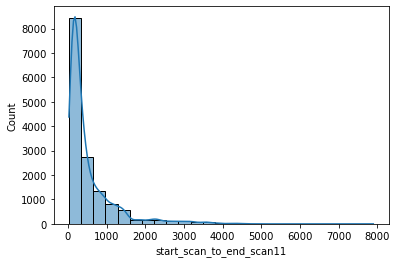

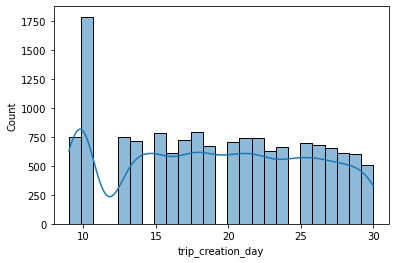

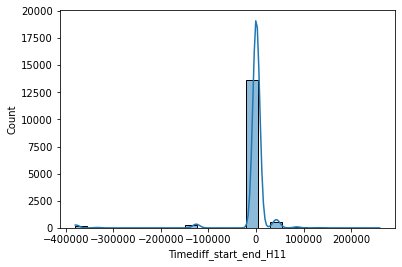

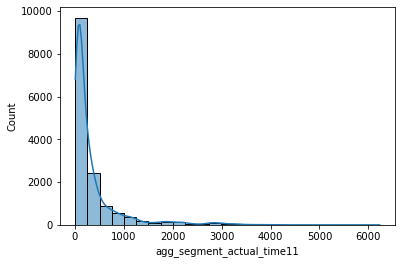

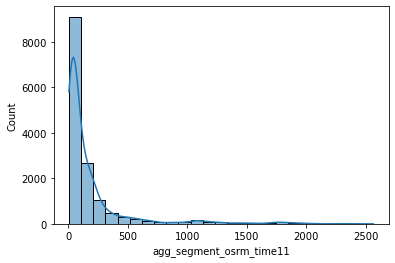

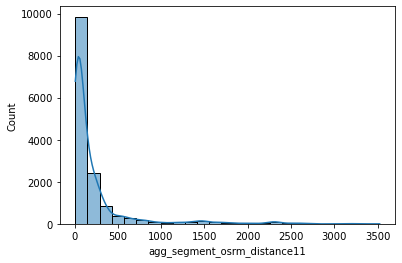

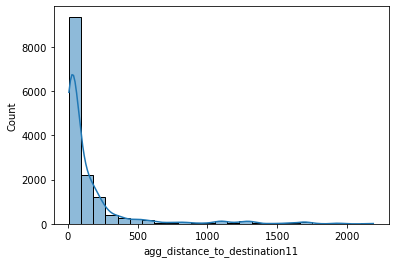

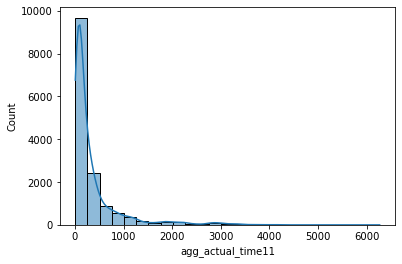

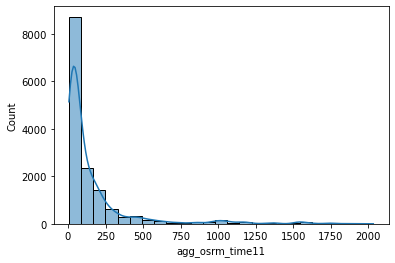

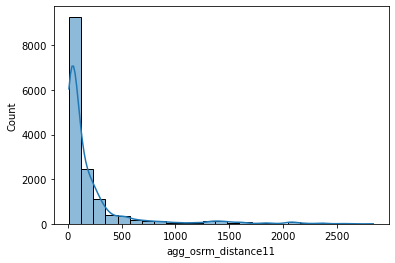

In [122]:
for i in a:
    sns.histplot(data = dfm, x = dfm[i],bins = 25,kde=True)
    plt.show()

### This reveals that entire data is right skewed

### Outlier Detection and their Treatment

In [123]:
num_cols = df.select_dtypes('float64').columns.values

In [124]:
num_cols

array(['actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'Timediff_start_end_H',
       'agg_segment_osrm_distance', 'agg_segment_osrm_distance1',
       'agg_distance_to_destination', 'agg_osrm_distance'], dtype=object)

In [127]:
def unn(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
    sns.histplot(d, kde=True, ax=ax[0])
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout

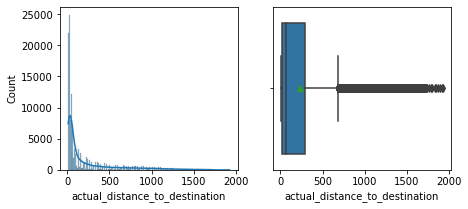

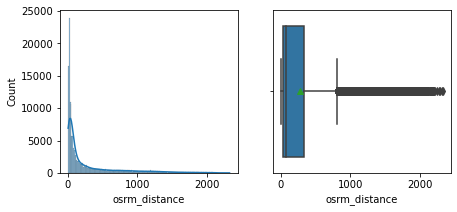

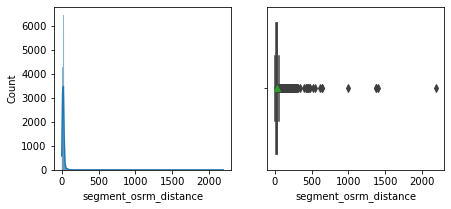

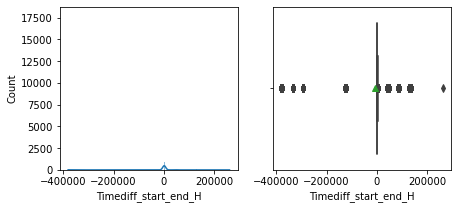

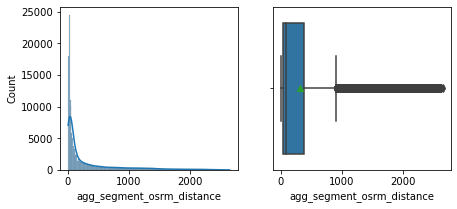

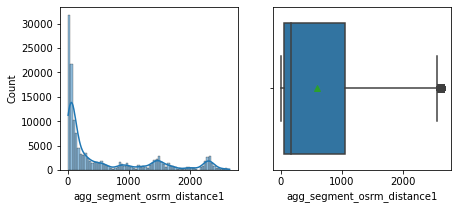

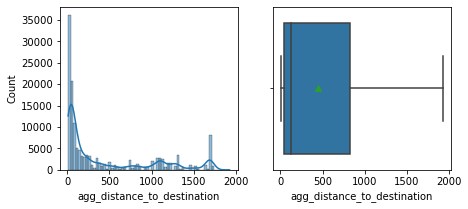

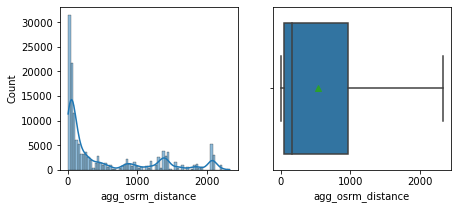

In [128]:
for f in num_cols:
    unn(df[f])
plt.show()

### As we can see there are outlier in all the numeric features

In [134]:
#treating outliers:
def treat_outlier(variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1,q3=np.percentile(variable,[25,75])
    iqr = q3-q1
    lower_range = q1-(1.5*iqr)
    upper_range = q3+(1.5*iqr)
    return lower_range,upper_range

In [135]:
for col in num_cols:
    ir,ur=treat_outlier(df[col])
    df[col]=np.where(df[col]>ur,ur,df[col])
    df[col]=np.where(df[col]<ir,ir,df[col])

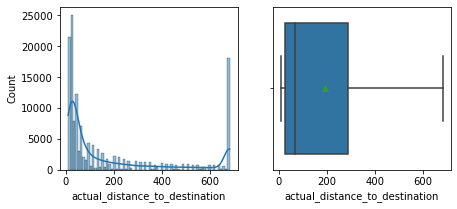

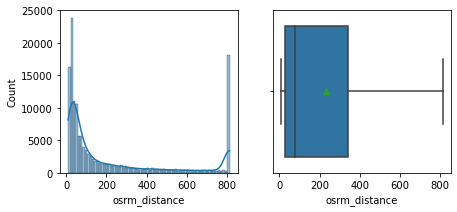

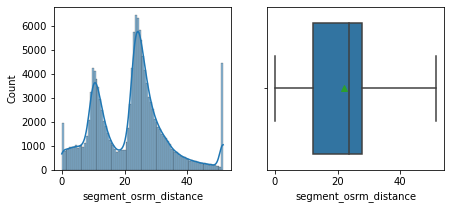

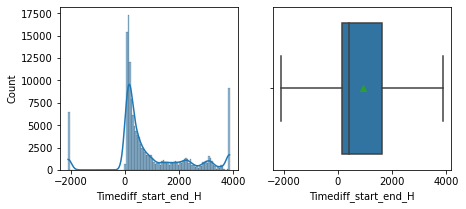

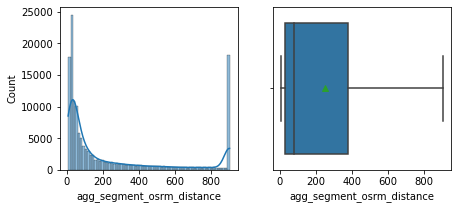

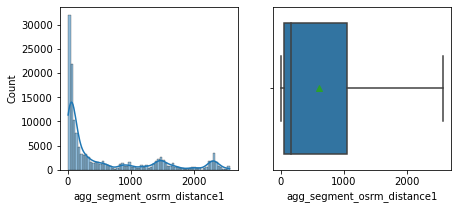

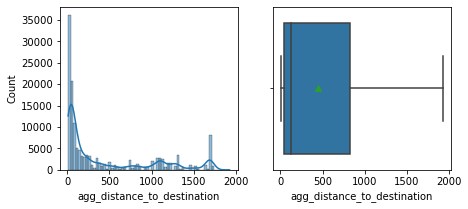

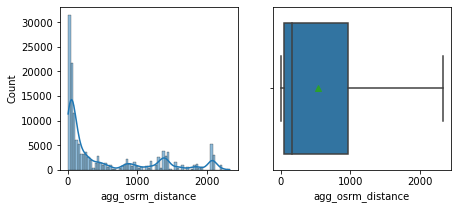

In [136]:
#Lets check where outliers are removed or not:
for f in num_cols:
    unn(df[f])
plt.show()

### As we see outlier are removed

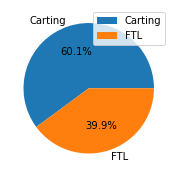

In [138]:
fig1, ax1 = plt.subplots(figsize=(7,3))
ax1.pie(dfm['route_type'].value_counts(), labels=df['route_type'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

### 60% data is from Carting rout_type & the remaining 40% is from FTL

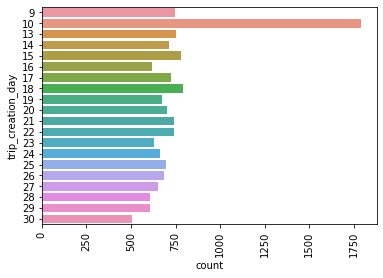

In [139]:
sns.countplot(y=dfm["trip_creation_day"])
plt.xticks(rotation=90)
plt.show()

In [141]:
dfm

,route_type,trip_uuid,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,...,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11,Source_City11,Source_Place11,Source_Code/State11,destination_City11,destination_Place11,destination_Code/State11,scan_diff_check
0,Carting,trip-153741093647649320,9,2018,20,195,195.0,167,88,102.7106,...,170,89,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat),0.0
10,FTL,trip-153768492602129387,9,2018,23,302,302.0,180,106,130.4089,...,183,95,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra),0.0
15,Carting,trip-153693976643699843,9,2018,14,108,109.0,60,16,18.7941,...,60,16,18.7941,LowerParel,CP (Maharashtra),None,Mumbai,Chndivli,PC (Maharashtra),1.0
17,FTL,trip-153687145942424248,9,2018,13,1031,1031.0,799,502,560.5092,...,805,486,524.7155,Bangalore,Nelmngla,H (Karnataka),Aluva,Peedika,H (Kerala),0.0
35,FTL,trip-153825970514894360,9,2018,29,261,262.0,151,137,115.7501,...,152,123,123.7654,Ludhiana,GillChwk,DC (Punjab),Ludhiana,MilrGanj,HB (Punjab),1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144828,FTL,trip-153799142965708367,9,2018,26,869,870.0,617,507,596.7341,...,625,423,518.8885,Dhar,Trimurti,D (Madhya Pradesh),Ahmedabad_East,H,1 (Gujarat),1.0
144847,Carting,trip-153695073416451616,9,2018,14,393,394.0,344,36,40.1360,...,344,31,33.7957,Mumbai,Jogeshwri,L (Maharashtra),Bhiwandi,Mankoli,HB (Maharashtra),1.0
144849,FTL,trip-153761584139918815,9,2018,22,614,615.0,288,111,129.3412,...,289,95,129.1588,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra),1.0
144854,Carting,trip-153718412883843340,9,2018,17,116,117.0,82,31,36.7671,...,84,33,36.7672,MAA,Poonamallee,HB (Tamil Nadu),Chennai,Hub (Tamil Nadu),None,1.0


### As start and end of the months have  less percentage of trips as compared to mid of the month dates 

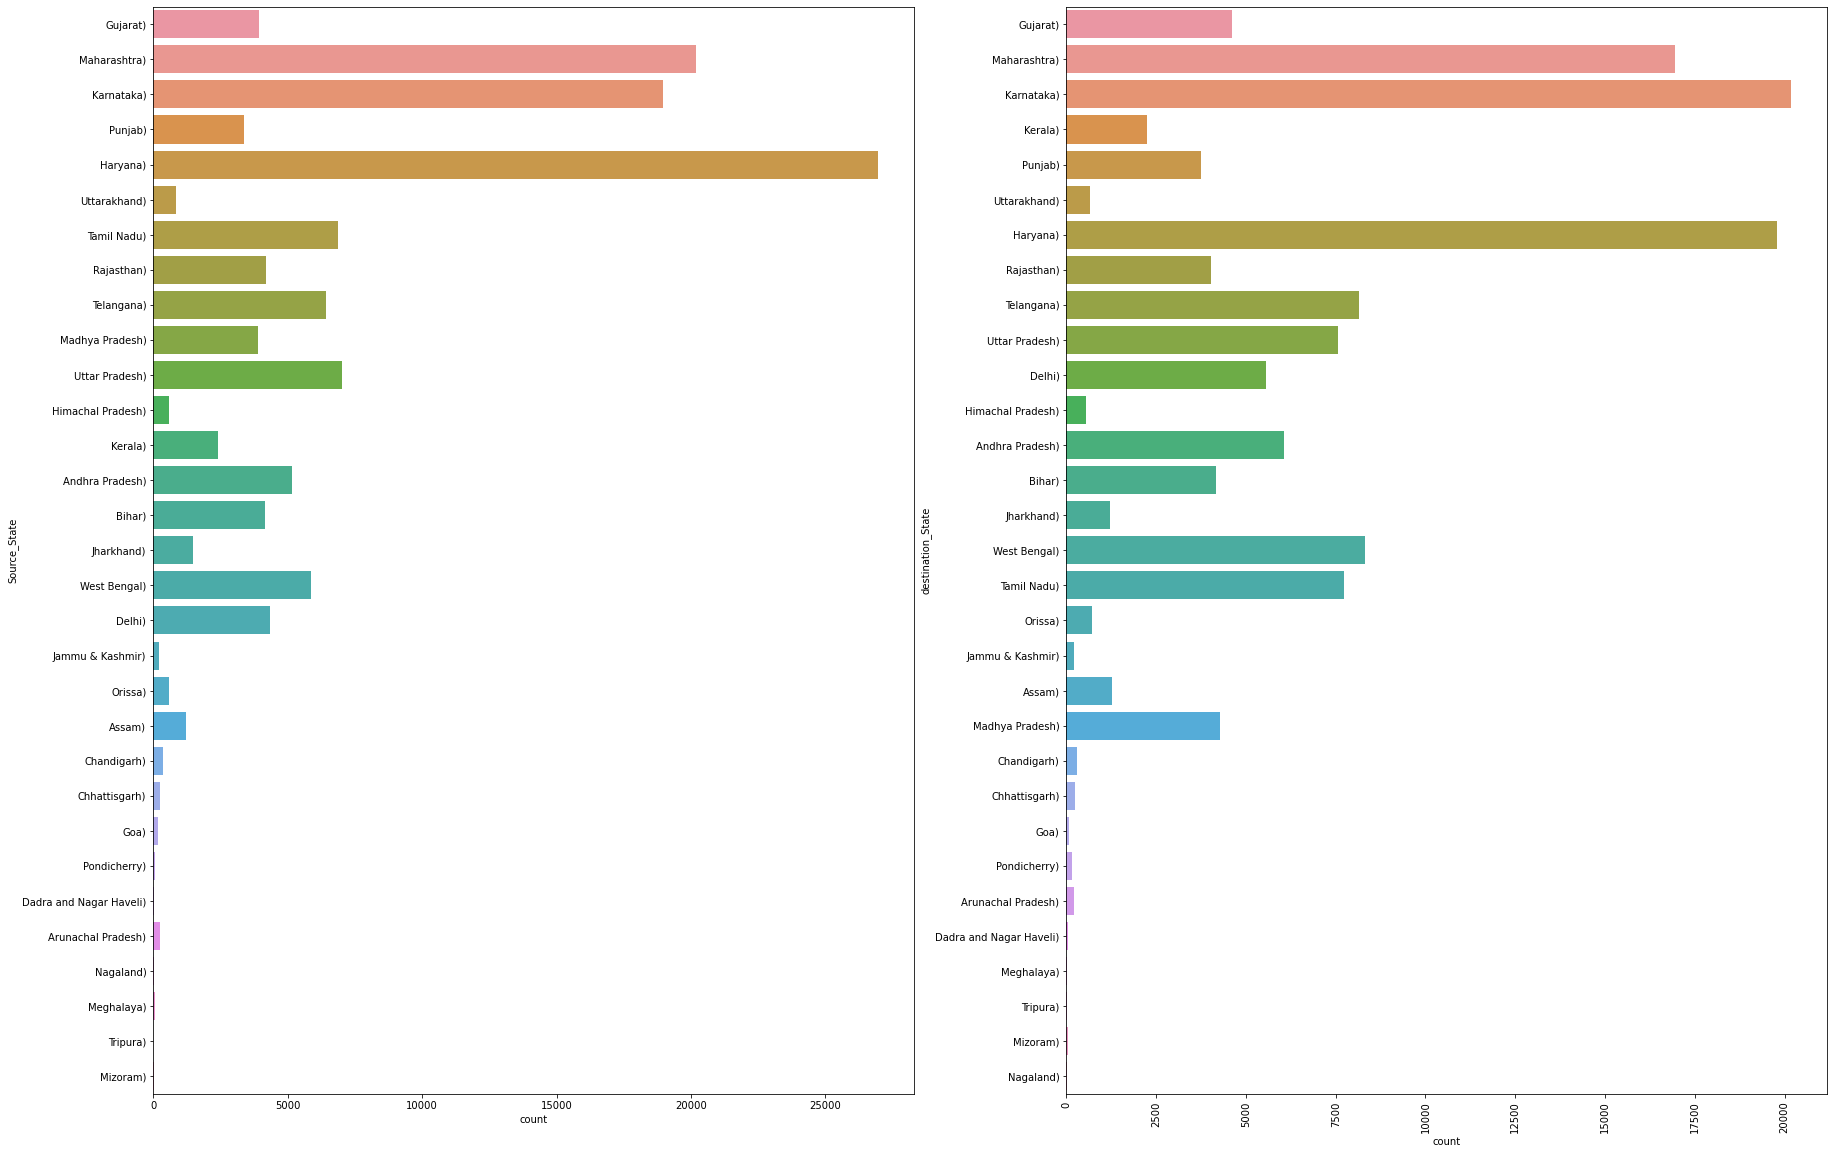

<Figure size 432x288 with 0 Axes>

In [147]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,20))
sns.countplot(y=df['Source_State'],ax=ax[0])
sns.countplot(y=df['destination_State'],ax=ax[1])

plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

### As from the graph most of the order is coming from Maharastra and Haryana and reaching to Maharastra and karnataka and followed by haryana

### Bivariant Analysis

In [148]:
lk=dfm.loc[:,['route_type', 'trip_uuid',
       'start_scan_to_end_scan11', 'trip_creation_month',
       'trip_creation_day', 'Timediff_start_end_H11', 'agg_segment_actual_time11',
       'agg_segment_osrm_time11', 'agg_segment_osrm_distance11',
       'agg_distance_to_destination11', 'agg_actual_time11', 'agg_osrm_time11',
       'agg_osrm_distance11', 'Source_City11', 'Source_Place11', 'Source_Code/State11',
       'destination_City11', 'destination_Place11', 'destination_Code/State11']]

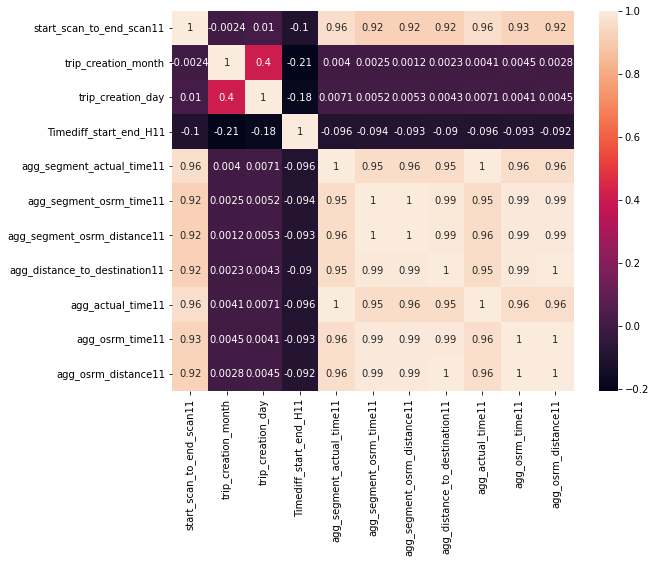

In [149]:
plt.figure(figsize = (9, 7))
sns.heatmap(lk.corr(),annot=True)
plt.show()

### As from the heatmap all the features is heavly positivelly related with each others

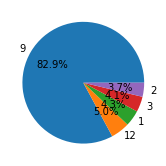

C:\Users\akgup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


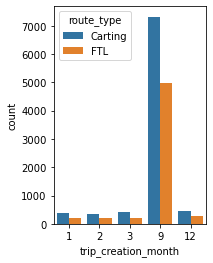

In [153]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.pie(dfm['trip_creation_month'].value_counts(), labels=dfm['trip_creation_month'].unique(), autopct='%1.1f%%')
plt.show()
fig2 = plt.figure()
ax2 = fig2.add_subplot(122)
sns.countplot(dfm['trip_creation_month'], hue=dfm['route_type'])
plt.show()

### As 82% of the trip are from october month and remaining is from other months

In [162]:
# one hot endoing of rout_type columns:
new_df=pd.concat([dfm,pd.get_dummies(dfm['route_type'])],axis=1)

In [163]:
#dropping the original column
new_df.drop(['route_type'],axis=1, inplace=True)

In [164]:
new_df.head(2)

,trip_uuid,trip_creation_month,trip_creation_year,trip_creation_day,start_scan_to_end_scan11,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,...,agg_osrm_distance11,Source_City11,Source_Place11,Source_Code/State11,destination_City11,destination_Place11,destination_Code/State11,scan_diff_check,Carting,FTL
0,trip-153741093647649320,9,2018,20,195,195.0,167,88,102.7106,82.981842,...,107.4515,Anand,VUNagar,DC (Gujarat),Anand,Vaghasi,IP (Gujarat),0.0,1,0
10,trip-153768492602129387,9,2018,23,302,302.0,180,106,130.4089,100.708423,...,129.3519,Bhiwandi,Mankoli,HB (Maharashtra),Pune,Tathawde,H (Maharashtra),0.0,0,1


### Standarization and Normalization

In [165]:
std=dfm.loc[:,['start_scan_to_end_scan11', 'trip_creation_month',
       'trip_creation_day', 'Timediff_start_end_H11', 'agg_segment_actual_time11',
       'agg_segment_osrm_time11', 'agg_segment_osrm_distance11',
       'agg_distance_to_destination11', 'agg_actual_time11', 'agg_osrm_time11',
       'agg_osrm_distance11']]

In [167]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(std)
std_data = pd.DataFrame(std_data, columns=std.columns)
std_data.head()

,start_scan_to_end_scan11,trip_creation_month,trip_creation_day,Timediff_start_end_H11,agg_segment_actual_time11,agg_segment_osrm_time11,agg_segment_osrm_distance11,agg_distance_to_destination11,agg_actual_time11,agg_osrm_time11,agg_osrm_distance11
0,-0.509816,0.283641,0.128965,0.105094,-0.336020,-0.295530,-0.289226,-0.267399,-0.333380,-0.268360,-0.263380
1,-0.347379,0.283641,0.602657,0.107265,-0.312649,-0.238302,-0.222742,-0.209384,-0.310223,-0.246325,-0.204312
2,-0.641892,0.283641,-0.818419,0.103350,-0.528375,-0.524442,-0.490651,-0.485203,-0.529322,-0.536451,-0.502498
3,0.759321,0.283641,-0.976316,0.122050,0.800137,1.020712,0.809626,0.676718,0.797742,1.189614,0.862025
4,-0.409621,0.283641,1.550040,0.106453,-0.364783,-0.139743,-0.257928,-0.226467,-0.365443,-0.143496,-0.219380


### Insights

### . Data is heavily right skewed

### . Almost all the features are heavy positively correleated with each other & which is intutive as well.

### . 60% data is from Carting rout_type & the remaining 40% is from FTL

### . 82% of the trips are from October Month & remaining are from other months

### . Start & End dates of the months have less percent of trips compare to mid of the month. Though the difference is not huge

### . Most of the order is coming from Maharastra ,Haryana and karnataka and  reaching to Maharastra and karnataka and followed by haryana¶

### . Very least orders coming from the North east states(orisa, assam, nagaland, Mehgalaya)

### There is no difference in the population means of time taken between od_start_time and od_end_time and start_scan_to_end_scan

### There is a difference between the population means of agg_Actual_time & agg_osrm_time. Mean of agg_Actual_time is bigger than that of agg_osrm_time

### There is a difference between the population means of agg_Actual_time & agg_segment_actual_time. Mean of agg_Actual_time is bigger than that of agg_segment_actual_time

### There is a difference between the population means of agg_osrm_distance & agg_segment_osrm_distance.

### There is a difference between the population means of osrm_time & segment_osrm_time.

### Recommendation

### Least orders are reaching/coming from North East states, more corridors/campaigns can be promoted to penetrate in these states as well.

### Most of the orders are coming from/reaching to Maharashtra & Karnataka, existing corridors can be further enhanced to maintain the penetration from these areas.Also a further profiling of these orders can be made from more rich data to get to know why major orders are coming from these corridors

### FTL route consists of 40% of the total orders. More ways to promote FTL route handling system can be implemented to increase this percentage